    Feature  Chi-squared Score  Chi-squared p-value  Anova F-score  \
0   BodyFat         806.662190        2.768651e-173     447.691793   
2    Weight         392.555788         1.128943e-83      29.593925   
6   Abdomen         181.608781         3.365253e-38      83.868389   
1       Age         102.539484         2.831942e-21       8.060394   
5     Chest          74.627293         2.389146e-15      45.043021   
7       Hip          41.631221         1.989127e-08      29.442291   
8     Thigh          31.144988         2.859826e-06      22.543959   
11   Biceps          16.472571         2.446380e-03      18.657249   
9      Knee           8.559177         7.311363e-02      18.054292   
4      Neck           8.300257         8.117835e-02      16.673072   
12  Forearm           4.203273         3.791943e-01       8.226203   
10    Ankle           2.132262         7.114479e-01       4.528019   
3    Height           1.213867         8.758102e-01       1.601909   
13    Wrist         

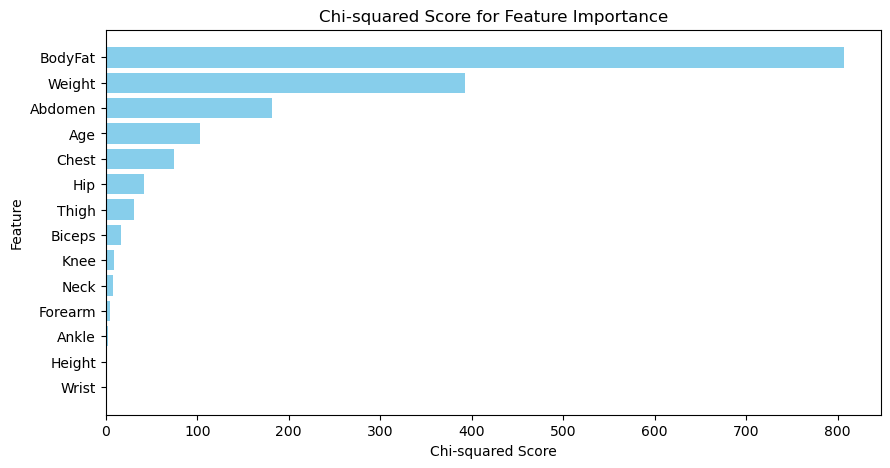

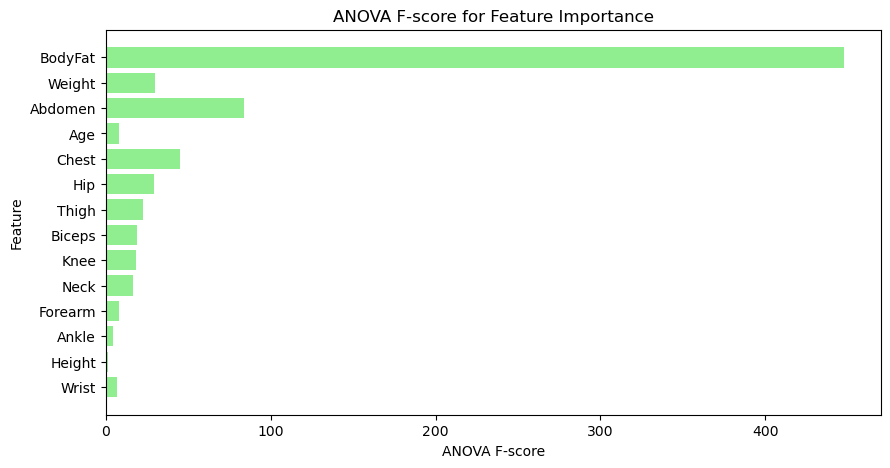

In [1]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.feature_selection import chi2, f_classif
import pandas as pd

# Load the dataset 
data = pd.read_csv("bodyfat.csv")

# Extract features and target variable
X = data.drop(['Density'], axis=1)  # Features
y = data['Density']  # Target variable

# Discretize the target variable into bins
num_bins = 5  # Adjust the number of bins as needed
kbins = KBinsDiscretizer(n_bins=num_bins, encode='ordinal', strategy='uniform')
y_discrete = kbins.fit_transform(y.values.reshape(-1, 1)).ravel()  # Convert to 1D array

# Perform Chi-squared test
chi2_scores, p_values_chi2 = chi2(X, y_discrete)

# Perform Anova test
f_scores, p_values_anova = f_classif(X, y_discrete)

# Create DataFrame to store results
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Chi-squared Score': chi2_scores,
    'Chi-squared p-value': p_values_chi2,
    'Anova F-score': f_scores,
    'Anova p-value': p_values_anova
})

# Rank features based on importance
feature_importance_ranked = feature_importance.sort_values(by=['Chi-squared Score', 'Anova F-score'], ascending=False)

# Display ranked feature importance
print(feature_importance_ranked)

import matplotlib.pyplot as plt

# Plot Chi-squared scores
plt.figure(figsize=(10, 5))
plt.barh(feature_importance_ranked['Feature'], feature_importance_ranked['Chi-squared Score'], color='skyblue')
plt.xlabel('Chi-squared Score')
plt.ylabel('Feature')
plt.title('Chi-squared Score for Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to display features from top to bottom
plt.show()

# Plot ANOVA F-scores
plt.figure(figsize=(10, 5))
plt.barh(feature_importance_ranked['Feature'], feature_importance_ranked['Anova F-score'], color='lightgreen')
plt.xlabel('ANOVA F-score')
plt.ylabel('Feature')
plt.title('ANOVA F-score for Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to display features from top to bottom
plt.show()